In [1]:
import pandas as pd
from sim_classes import TeamStatGen, TeamProfile, GameManager
from config import game_setup
import matplotlib.pyplot as plt

In [2]:
def aggregate_results(df):
    home_win = 0
    away_win = 0
    tie_game = 0
    for index, row in df.iterrows():
        if row['home_score'] > row['away_score']:
            home_win += 1
        elif row['home_score'] < row['away_score']:
            away_win += 1
        else:
            tie_game += 1

    print(f'Home win: {home_win / len(df) * 100}%')
    print(f'Away win: {away_win / len(df) * 100}%')
    print(f'Tie game: {tie_game / len(df) * 100}%')

def analyze_game(f = 1035509, sim_count = 50):
    team_stats = TeamStatGen(f)
    home_team = TeamProfile(team_stats.configure_team_stats('home'))
    away_team = TeamProfile(team_stats.configure_team_stats('away'))
    result_df = pd.DataFrame(columns=['home_score', 'away_score'])

    for i in range(sim_count):
        game = GameManager(home_team, away_team, game_setup)
        result_df.loc[len(result_df)] = game.run_game('scores') #type: ignore

    pivot_table = result_df.pivot_table(index='home_score', columns='away_score', aggfunc='size')
    plt.imshow(pivot_table, cmap='viridis', interpolation='nearest')  # Adjust cmap and interpolation as needed
    plt.xlabel('Away')
    plt.ylabel('Home')
    plt.colorbar(label='Goals')
    for i in range(len(pivot_table.index)):
        for j in range(len(pivot_table.columns)):
            plt.text(j, i, f'{pivot_table.values[i, j] / len(result_df) *100:0.0f}%',
                    ha="center", va="center", color="white")


    plt.show()
    aggregate_results(result_df)

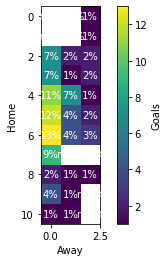

Home win: 96.0%
Away win: 2.0%
Tie game: 2.0%


In [33]:
analyze_game(1035389, 100)